In [2]:
import xarray as xr
# open the 'LGMR_GMST_ens.nc' file
ds_ens = xr.open_dataset('LGMR_GMST_ens.nc')
ds_ens

<xarray.Dataset>
Dimensions:  (age: 120, nEns: 500)
Coordinates:
  * age      (age) float32 100.0 300.0 500.0 ... 2.35e+04 2.37e+04 2.39e+04
  * nEns     (nEns) float32 1.0 2.0 3.0 4.0 5.0 ... 497.0 498.0 499.0 500.0
Data variables:
    gmst     (nEns, age) float32 ...

In [3]:
import xarray as xr
# open the 'LGMR_GMST_ens.nc' file
ds_climo = xr.open_dataset('LGMR_GMST_climo.nc')
ds_climo

<xarray.Dataset>
Dimensions:   (age: 120)
Coordinates:
  * age       (age) float32 100.0 300.0 500.0 ... 2.35e+04 2.37e+04 2.39e+04
Data variables:
    gmst      (age) float32 ...
    gmst_std  (age) float32 ...

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


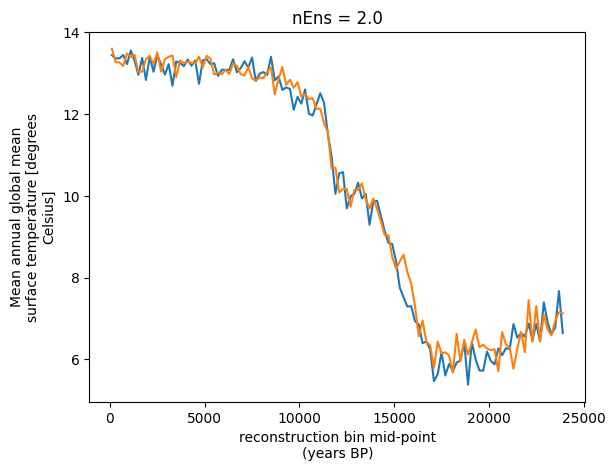

In [7]:
# plot a figure for a record in ds_ens
ds_ens['gmst'].isel(nEns=0).plot()
ds_ens['gmst'].isel(nEns=1).plot()

In [3]:
import xarray as xr
# open the 'LGMR_GMST_ens.nc' file
ds_sat = xr.open_dataset('LGMR_SAT_climo.nc')
ds_sat

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


<xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, age: 120)
Coordinates:
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * age      (age) float32 100.0 300.0 500.0 ... 2.35e+04 2.37e+04 2.39e+04
Data variables:
    sat      (age, lat, lon) float32 ...
    sat_std  (age, lat, lon) float32 ...

In [3]:
# plot the heat map for the data variable 'sat' in ds_sat
ds_sat.info


<bound method Dataset.info of <xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, age: 120)
Coordinates:
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * age      (age) float32 100.0 300.0 500.0 ... 2.35e+04 2.37e+04 2.39e+04
Data variables:
    sat      (age, lat, lon) float32 ...
    sat_std  (age, lat, lon) float32 ...>

In [16]:
# plot the amplitude of deglacial warming
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

def plot_sat(ds):
    # extract the first value of 'sat'
    sat =ds['sat'].isel(age=0)- ds['sat'].isel(age=119)

    # create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(projection=ccrs.PlateCarree()))

    # add coastline and gridlines
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines()

    # plot heatmap
    cmap = plt.cm.get_cmap('YlOrRd')
    im = ax.pcolormesh(ds.lon, ds.lat, sat, transform=ccrs.PlateCarree(), cmap=cmap, shading='auto')

    # add colorbar
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05)
    cbar.ax.set_ylabel('Delta SAT')

    # set title and show plot
    plt.show()


c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
C:\Users\zps19\AppData\Local\Temp\ipykernel_55836\3886785444.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('YlOrRd')


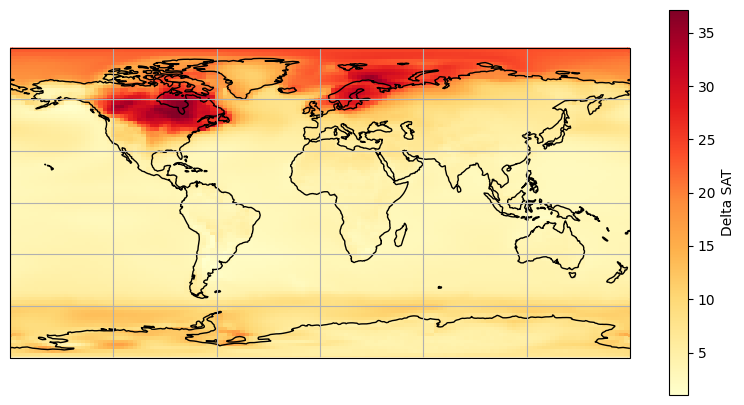

In [17]:
plot_sat(ds_sat)

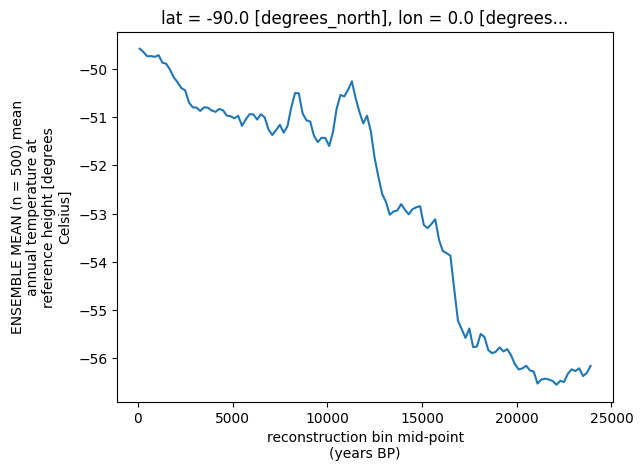

In [23]:
ds_sat.sel(lat=-90, lon=0)['sat'].plot()

In [58]:
ds_sat.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, age: 120)
Coordinates:
  * lat      (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * age      (age) float32 100.0 300.0 500.0 ... 2.35e+04 2.37e+04 2.39e+04
Data variables:
    sat      (age, lat, lon) float32 -49.57 -49.42 -49.55 ... -41.98 -41.98
    sat_std  (age, lat, lon) float32 ...>

<function matplotlib.pyplot.show(close=None, block=None)>

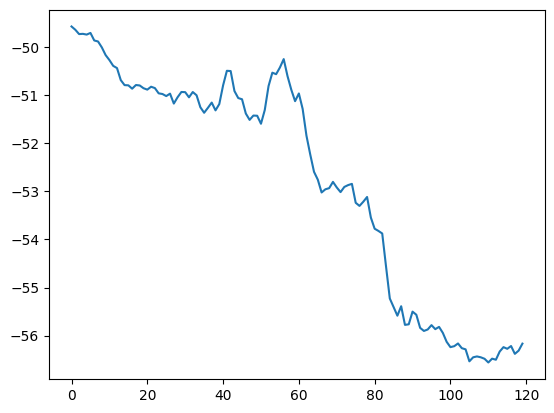

In [13]:
# get all the sat from ds_sat and put it to a ndarray
sat = ds_sat['sat'].values
sat.shape
# reshape the sat to a 2D array
sat = sat.reshape(120, 96*144)
sat=sat.T
sat.shape

# plot the first row of sat
from matplotlib import pyplot as plt
plt.plot(sat[0,:])
plt.show

In [57]:
sat

array([[-49.57208 , -49.64024 , -49.73038 , ..., -56.378887, -56.31185 ,
        -56.16613 ],
       [-49.421402, -49.47167 , -49.560814, ..., -56.36851 , -56.30149 ,
        -56.155342],
       [-49.554913, -49.617664, -49.706593, ..., -56.385773, -56.31879 ,
        -56.173565],
       ...,
       [-18.328548, -18.336205, -17.916368, ..., -42.61696 , -42.26799 ,
        -41.97171 ],
       [-18.322424, -18.330492, -17.910149, ..., -42.622543, -42.27324 ,
        -41.977016],
       [-18.317688, -18.326065, -17.905447, ..., -42.627247, -42.277664,
        -41.98161 ]], dtype=float32)

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

def temp_pca(temperature, n_pc=2):
    # Normalize the data
    scaler = StandardScaler()
    temp_scaled = scaler.fit_transform(temperature)

    # pca
    pca_T = PCA(n_components=n_pc)
    columns = [f'pc {i}' for i in range(1, n_pc+1)]

    pca_temp = pca_T.fit_transform(temp_scaled.T)
    pca_temp_df = pd.DataFrame(data=pca_temp, columns=columns)

    temp_score = temp_scaled.dot(zscore(pca_temp))

    v_exp_temp = pca_T.explained_variance_ratio_
    
    return temp_score, v_exp_temp, pca_temp_df


In [17]:
temp_score, v_exp_temp, pca_temp_df = temp_pca(sat, n_pc=2)
v_exp_temp

array([0.9351736 , 0.03980668], dtype=float32)

In [24]:
pca_temp_df.shape

(120, 2)

<Axes: >

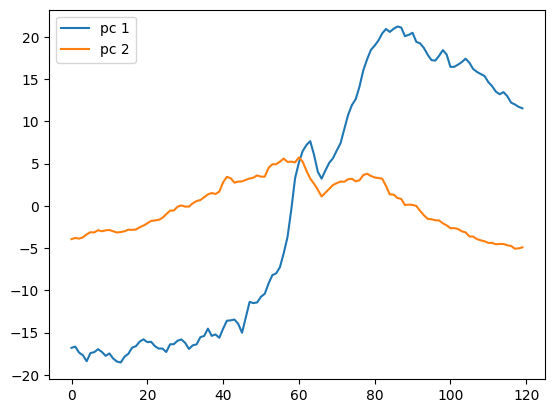

In [18]:
# plot the pca_temp_df
pca_temp_df.plot()

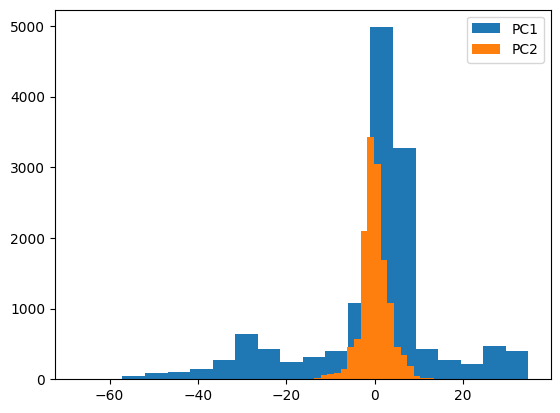

In [20]:
# plot the histogram of temp_score
plt.hist(temp_score[:,0], bins=20)
plt.hist(temp_score[:,1], bins=20)
# add legend
plt.legend(['PC1', 'PC2'])
# add title
plt.title('Histogram of the score of SAT on PC1 and PC2')
# add xlabel
plt.xlabel('Score')
# add ylabel
plt.ylabel('Count')
plt.show()

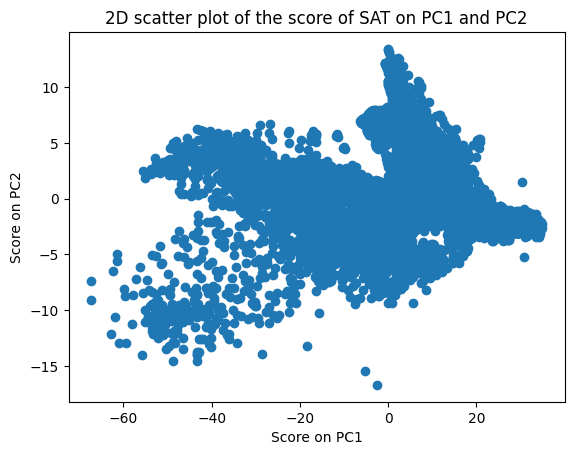

In [23]:
# plot the temp_score using 2d scatter plot
plt.scatter(temp_score[:,0], temp_score[:,1])
# add title
plt.title('2D scatter plot of the score of SAT on PC1 and PC2')
# add xlabel
plt.xlabel('Score on PC1')
# add ylabel
plt.ylabel('Score on PC2')
plt.show()

In [39]:
def fit_2d_gmm(pca_score, n_components=3):
    """Fit a 2D Gaussian mixture model to the temperature scores.

    Parameters
    ----------
    pca_score : numpy.ndarray
        2D array of pca scores
    n_components : int
        Number of components in the mixture model

    """

    import matplotlib.pyplot as plt
    import numpy as np
    from sklearn.mixture import GaussianMixture

    # create a 2D GMM model
    gmm_model = GaussianMixture(n_components=n_components, covariance_type='full')

    # fit the model to the two columns of pca_score
    gmm_model.fit(pca_score)

    # get the predicted class labels for each data point
    labels = gmm_model.predict(pca_score)
    print(labels)

    # plot the results
    fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=300)

    # Plot the scatter plot of the two columns
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    for i in range(n_components):
        mask = labels == i
        ax[0].scatter(pca_score[:, 0][mask], pca_score[:, 1][mask], s=10, alpha=0.5, color=colors[i % len(colors)])

    # Plot the contour plot of the fitted GMM
    x, y = np.meshgrid(np.linspace(np.min(pca_score[:, 0]), np.max(pca_score[:, 0]), 100),
                       np.linspace(np.min(pca_score[:, 1]), np.max(pca_score[:, 1]), 100))
    XX = np.array([x.ravel(), y.ravel()]).T
    Z = -gmm_model.score_samples(XX)
    Z = Z.reshape(x.shape)
    ax[1].contour(x, y, Z, cmap='coolwarm_r')

    # Add labels and title
    ax[0].set_xlabel('PC 1')
    ax[0].set_ylabel('PC 2')
    ax[1].set_xlabel('PC 1')
    ax[1].set_ylabel('PC 2')
    ax[0].set_title('Scatter plot of PCA scores')
    ax[1].set_title('Contour plot of fitted GMM')

    plt.tight_layout()
    plt.show()


[1 1 1 ... 2 2 2]


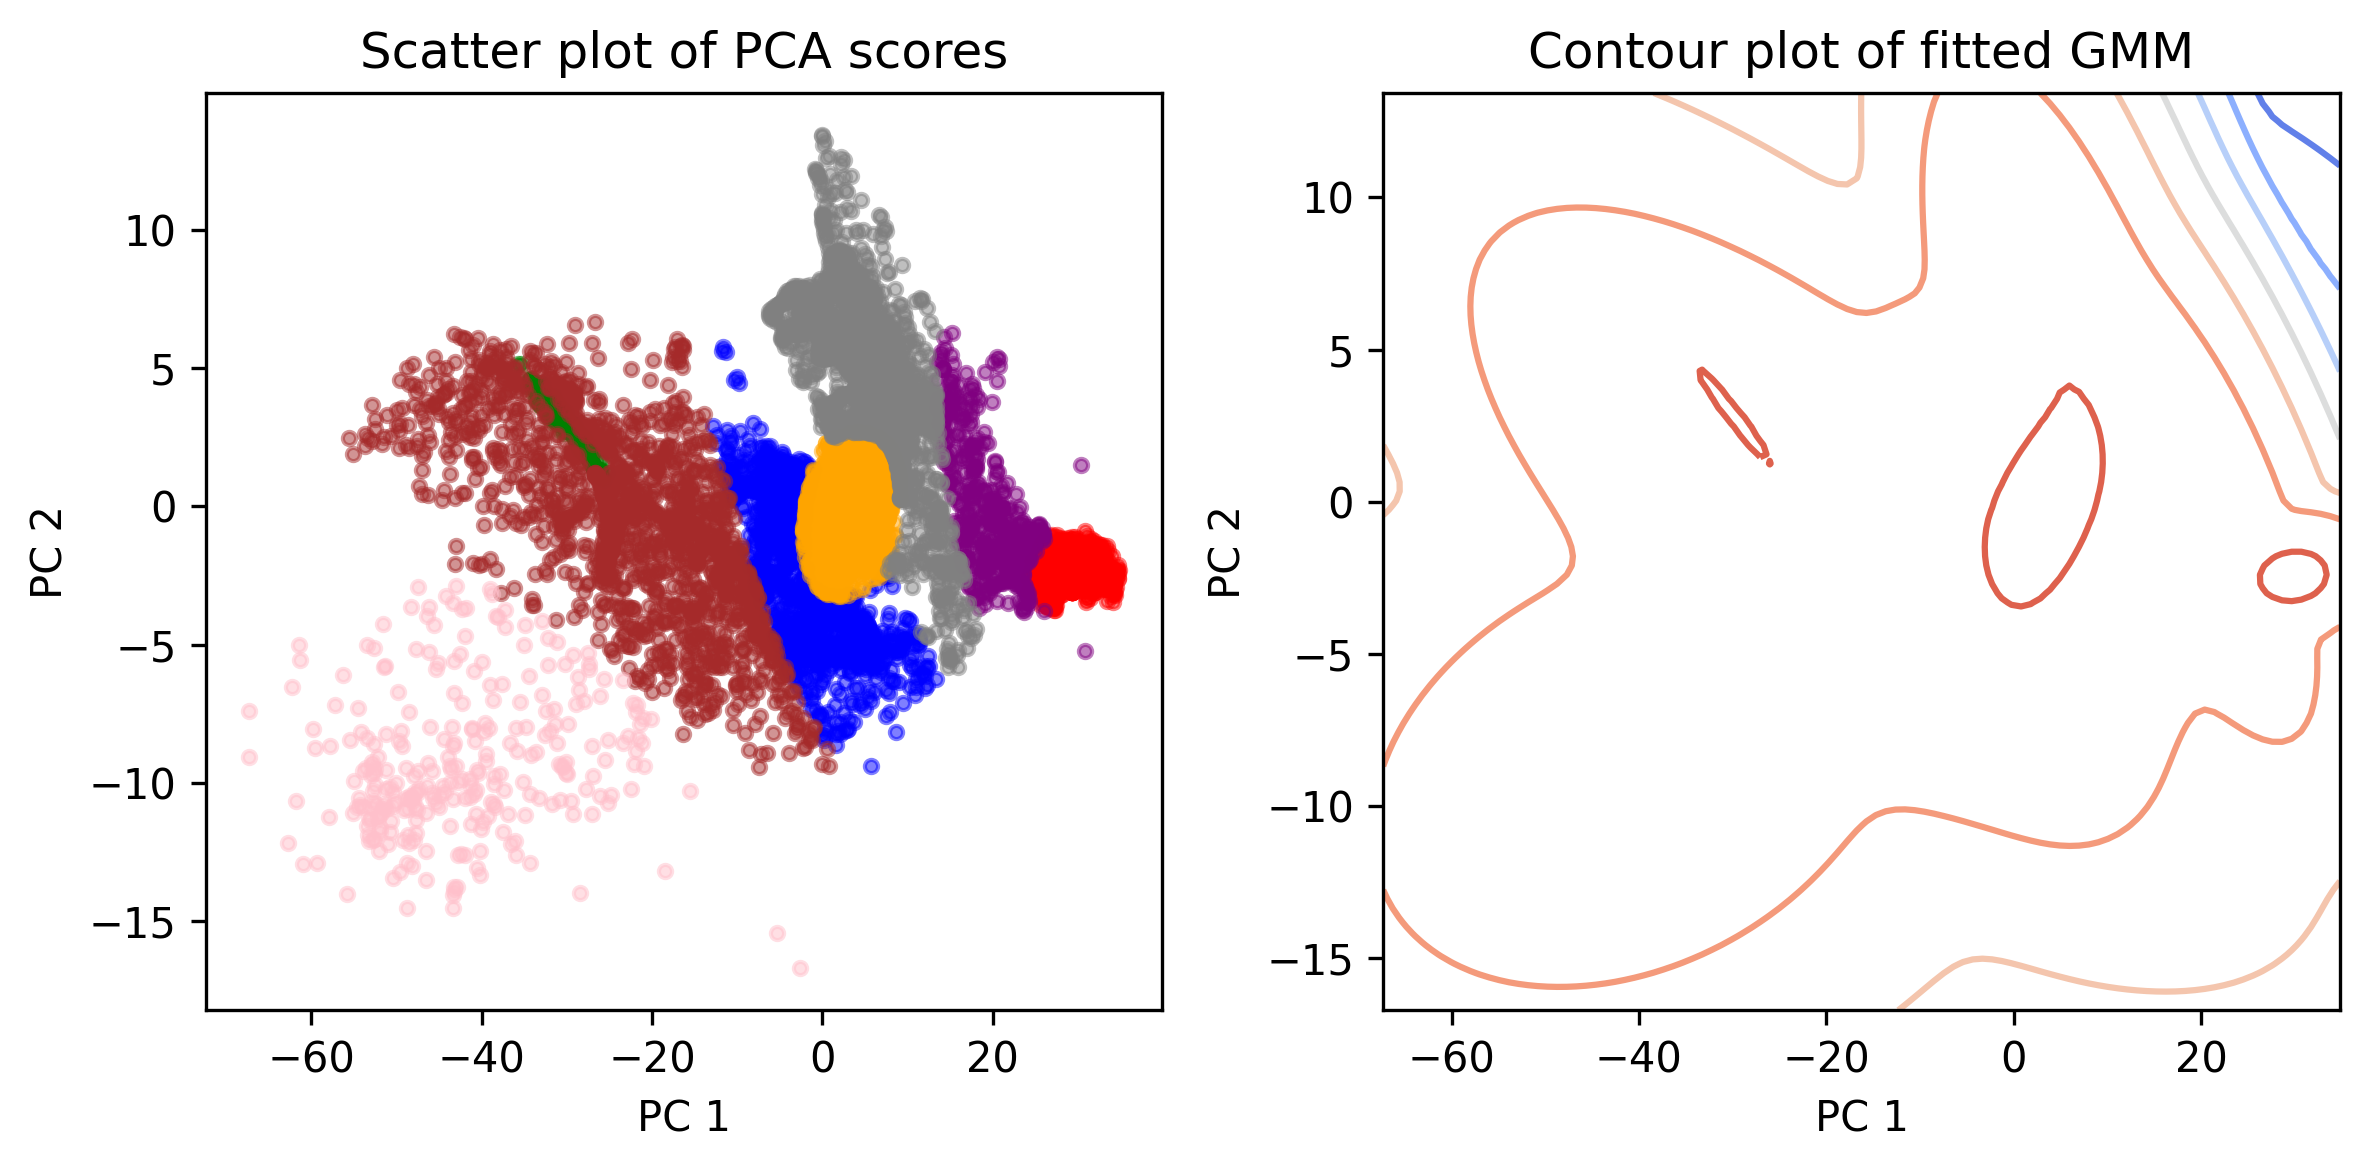

In [56]:
fit_2d_gmm(temp_score, n_components=8)

In [41]:
# calculate the bic score for the GMM model
from sklearn.mixture import GaussianMixture
gmm_model = GaussianMixture(n_components=6, covariance_type='full')
gmm_model.fit(temp_score)
gmm_model.bic(temp_score)


165273.8735017984

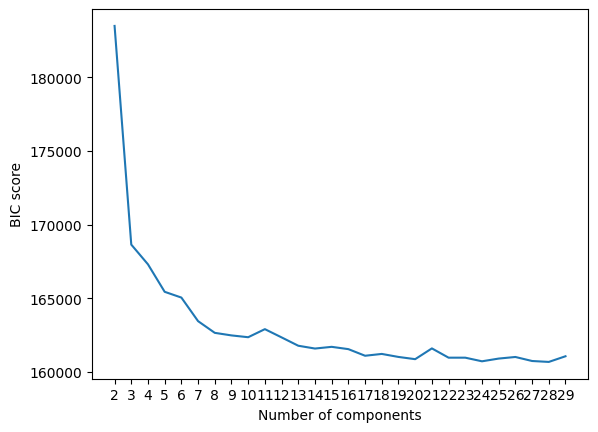

In [53]:
# set n_components to 2 to 10 and calculate the bic score for each model and plot the results
max_components = 30
bic = []
for i in range(2, max_components):
    gmm_model = GaussianMixture(n_components=i, covariance_type='full')
    gmm_model.fit(temp_score)
    bic.append(gmm_model.bic(temp_score))

plt.plot(range(2, max_components), bic)
# set xticks to be integers
plt.xticks(range(2, max_components))
plt.xlabel('Number of components')
plt.ylabel('BIC score')
plt.show()

In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
import numpy as np
from sklearn.mixture import GaussianMixture
import xarray as xr
import matplotlib.pyplot as plt

def fit_gmm(ds_sat, n_pc=2, n_components=3):
    """Fit a 2D Gaussian mixture model to the 'sat' data variable of an xarray dataset.

    Parameters
    ----------
    ds_sat : xarray.Dataset
        An xarray dataset containing a 'sat' data variable with dimensions (age, lat, lon).
    n_pc : int
        Number of principal components to retain after PCA
    n_components : int
        Number of components in the Gaussian mixture model

    Returns
    -------
    xarray.Dataset
        The updated xarray dataset with a new 'class_label' data variable.

    """

    # get all the sat from ds_sat and put it to a ndarray
    sat = ds_sat['sat'].values
    sat_shape = sat.shape

    # reshape the sat to a 2D array
    sat = sat.reshape(sat_shape[0], sat_shape[1]*sat_shape[2])
    sat = sat.T

    # Normalize the data
    scaler = StandardScaler()
    sat_scaled = scaler.fit_transform(sat)

    # PCA
    pca_sat = PCA(n_components=n_pc)
    columns = [f'pc {i}' for i in range(1, n_pc+1)]
    pca_sat_scores = pca_sat.fit_transform(sat_scaled.T)

    # calculate the PCA scores for the original unscaled data
    sat_scores = sat_scaled.dot(zscore(pca_sat_scores))

    # create a 2D GMM model
    gmm_model = GaussianMixture(n_components=n_components, covariance_type='full')

    # fit the model to the two columns of PCA scores
    gmm_model.fit(sat_scores)

    # get the predicted class labels for each data point
    class_labels = gmm_model.predict(sat_scores)

    # add the class labels to the xarray dataset
    ds_sat['class_label'] = (('lat', 'lon'), class_labels.reshape(sat_shape[1], sat_shape[2]))

    # plot the results
    fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=300)

    # plot the scatter plot of the two columns
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    for i in range(n_components):
        mask = class_labels == i
        ax[0].scatter(sat_scores[:, 0][mask], sat_scores[:, 1][mask], s=10, alpha=0.5, color=colors[i % len(colors)])

    # plot the contour plot of the fitted GMM
    x, y = np.meshgrid(np.linspace(np.min(sat_scores[:, 0]), np.max(sat_scores[:, 0]), 100),
                       np.linspace(np.min(sat_scores[:, 1]), np.max(sat_scores[:, 1]), 100))
    XX = np.array([x.ravel(), y.ravel()]).T
    Z = -gmm_model.score_samples(XX)
    Z = Z.reshape(x.shape)
    ax[1].contour(x, y, Z, cmap='coolwarm_r')

    # Add labels and title
    ax[0].set_xlabel('PC 1')
    ax[0].set_ylabel('PC 2')
    ax[1].set_xlabel('PC 1')
    ax[1].set_ylabel('PC 2')
    ax[0].set_title('Scatter plot of PCA scores')
    ax[1].set_title('Contour plot of fitted GMM')

    plt.tight_layout()
    plt.show()


In [67]:
ds_sat.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:      (lat: 96, lon: 144, age: 120)
Coordinates:
  * lat          (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * age          (age) float32 100.0 300.0 500.0 ... 2.35e+04 2.37e+04 2.39e+04
Data variables:
    sat          (age, lat, lon) float32 -49.57 -49.42 -49.55 ... -41.98 -41.98
    sat_std      (age, lat, lon) float32 ...
    class_label  (lat, lon) int64 0 0 0 0 0 0 0 0 0 0 0 ... 4 4 4 4 4 4 4 4 4 4>

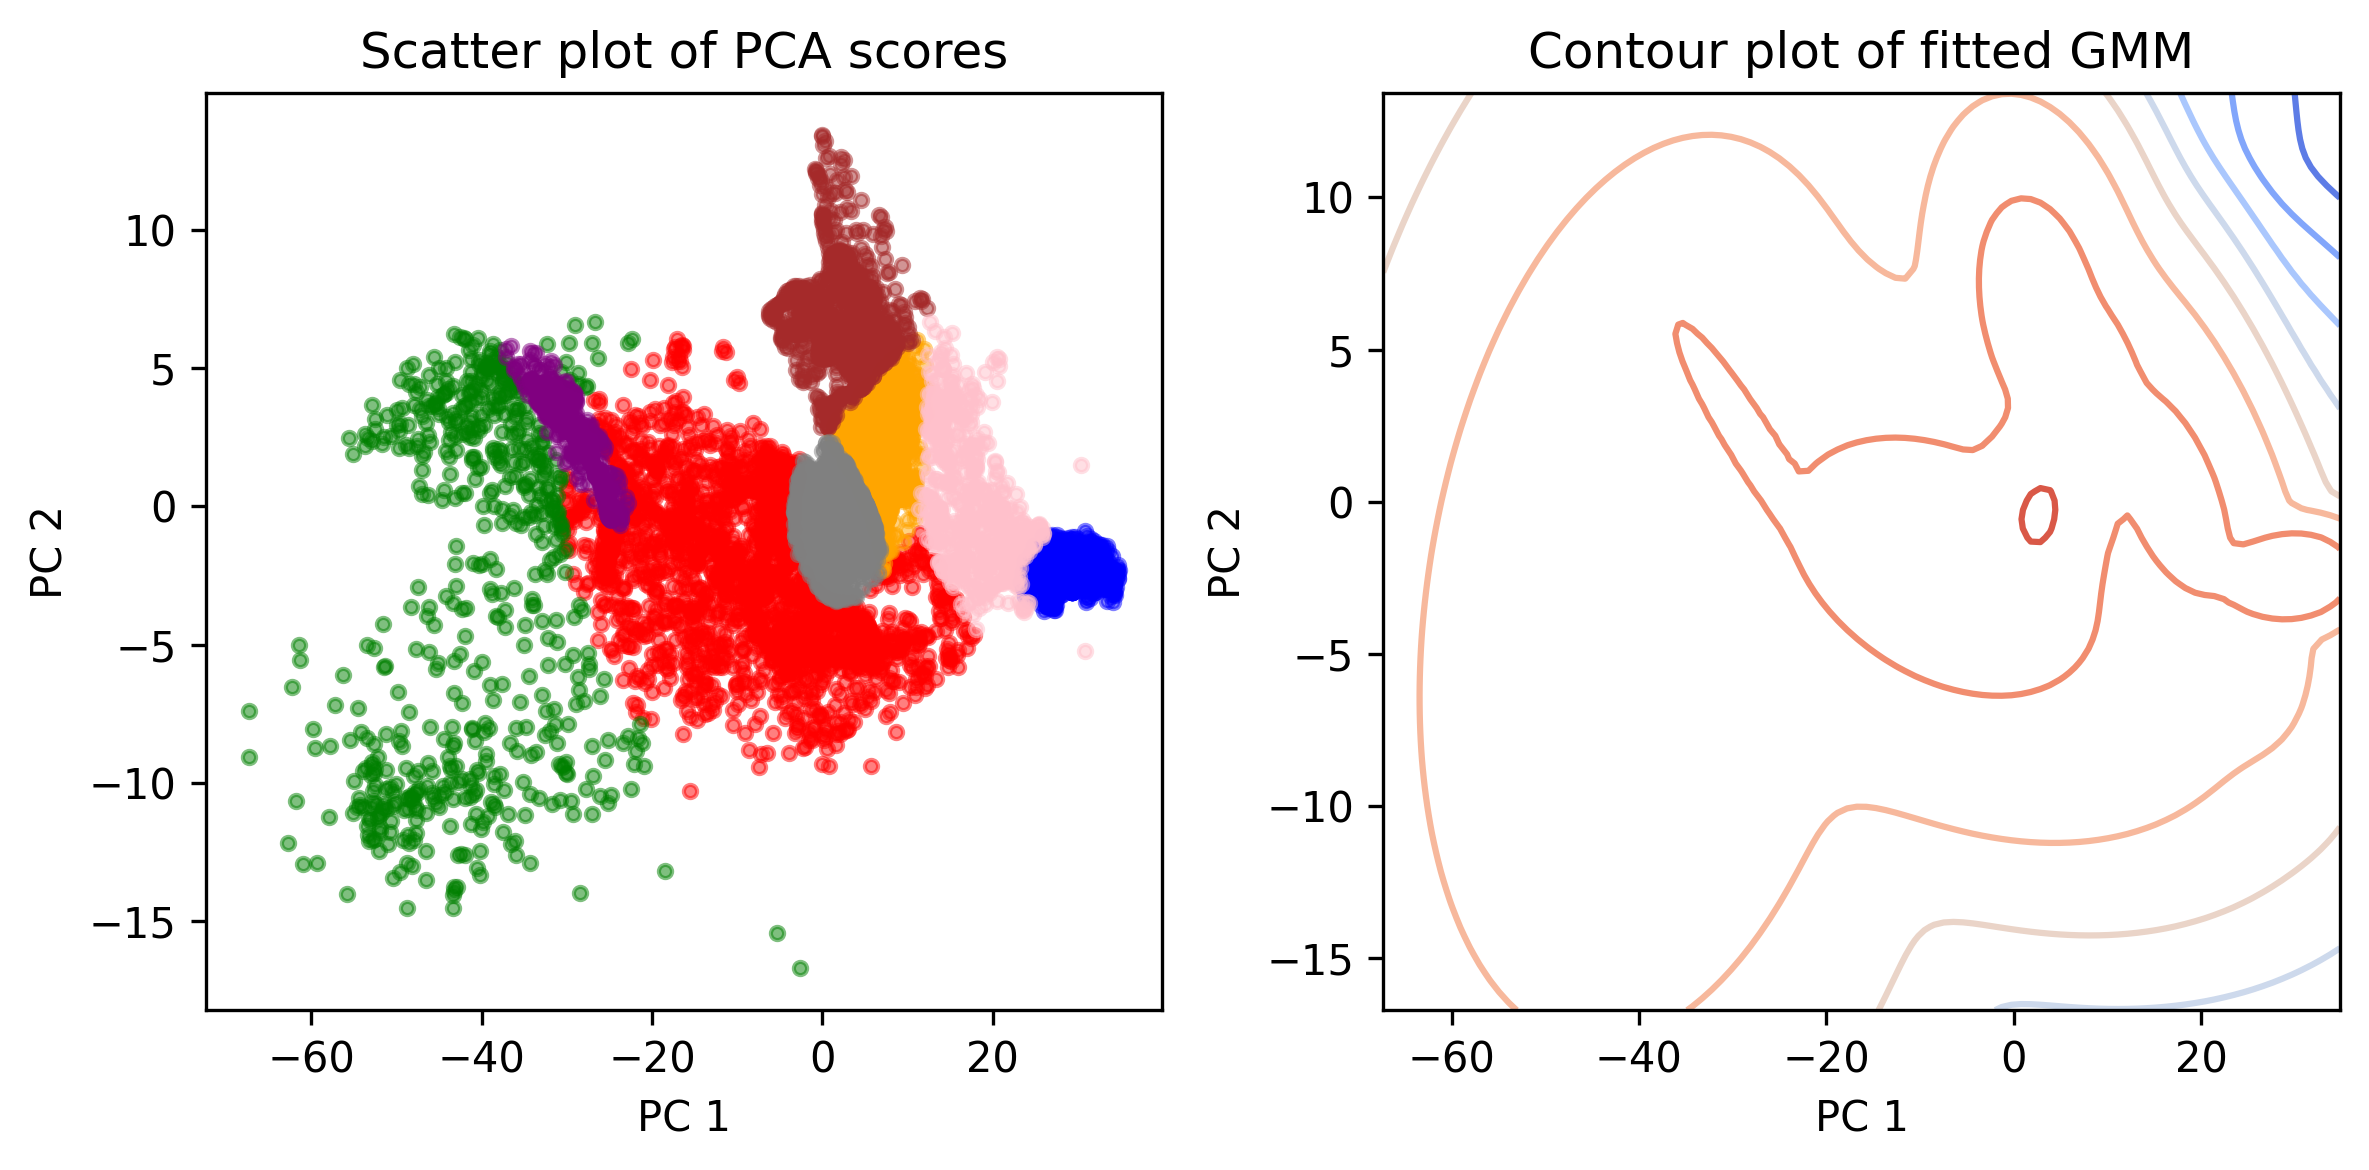

In [65]:
fit_gmm(ds_sat, n_pc=2, n_components=8)

In [270]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

def plot_labels(ds):
    sat_label = ds['class_label']

    # create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(projection=ccrs.PlateCarree()))

    # add coastline and gridlines
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines()

    # plot heatmap
    # cmap = plt.cm.get_cmap('tab20b', len(np.unique(sat_label)))
    # create colormap with unique colors for each class label
    # colors = list(mcolors.CSS4_COLORS.values())
    colors = list(mcolors.TABLEAU_COLORS.values())
    # print(colors[1:len(np.unique(sat_label))+1])
    cmap = mcolors.ListedColormap(colors[1:len(np.unique(sat_label))+1])

    im = ax.pcolormesh(ds.lon, ds.lat, sat_label, transform=ccrs.PlateCarree(), cmap=cmap, shading='auto')

    # add colorbar
    bounds = np.arange(len(np.unique(sat_label))+1) -0.5
    ticks = np.arange(len(np.unique(sat_label)))
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05, boundaries=bounds, ticks=ticks)
    cbar.ax.set_yticklabels(np.unique(sat_label))
    cbar.ax.set_ylabel('Class Label')

    # set title and show plot
    plt.show()


['#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']


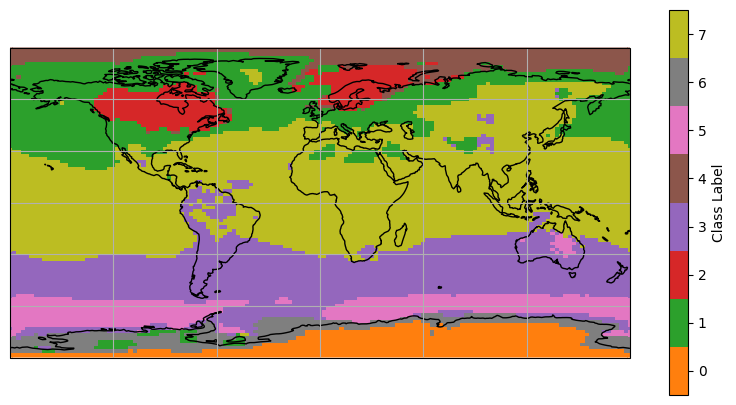

In [122]:
plot_labels(ds_sat)

In [216]:
import colorsys

# def lighten_color(colors, amount, index_not_lighten):
#     new_colors = []
#     for i, color in enumerate(colors):
#         if i != index_not_lighten:
#             # convert hex color code to RGB values
#             r, g, b = mcolors.hex2color(color)
#             # add amount of white to each color value
#             r += amount
#             g += amount
#             b += amount

#             # # keep color values within 0-1 range
#             r = min(0.8, max(0, r))
#             g = min(0.8, max(0, g))
#             b = min(0.8, max(0, b))
#             # convert RGB values back to hex color code
#             new_color = mcolors.rgb2hex((r, g, b))
#         else:
#             new_color = color
#         new_colors.append(new_color)
#     return new_colors

def lighten_color(colors, amount, index_not_lighten):
    new_colors = []
    for i, color in enumerate(colors):
        if i != index_not_lighten:
            # convert hex color code to RGB values
            r, g, b = mcolors.hex2color(color)
            # add amount of white to each color value
            r += amount
            g += amount
            b += amount
            # normalize values so that they don't go over 1
            m = max(r, g, b)
            if m > 1:
                r /= m
                g /= m
                b /= m
            # convert RGB values back to hex color code
            new_color = mcolors.rgb2hex((r, g, b,0.1), keep_alpha=False)
        else:
            new_color = color
        new_colors.append(new_color)
    return new_colors



In [262]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

def plot_indi_label(ds, label2plot,plot_class=False):
    sat_label = ds['class_label']

    # create a figure and axis
    fig = plt.figure(figsize=(16, 5))

    # add coastline and gridlines
    ax = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines()

    # plot heatmap
    colors = list(mcolors.TABLEAU_COLORS.values())
    colors = colors[1:len(np.unique(sat_label))+1]
    cmap = mcolors.ListedColormap(['#ffffff', colors[label2plot]])
    im = ax.pcolormesh(ds.lon, ds.lat, sat_label==label2plot, transform=ccrs.PlateCarree(), cmap=cmap, shading='auto')   
    ax.set_title('Class Label: '+str(label2plot))


   ##########################################
   # calculate average sat data for each label

    label_mask = ds['class_label'] == label2plot
    label_sat = ds['sat'].where(label_mask)
    label_sat_average = label_sat.mean(dim=('lat', 'lon'))

    # create axis for the second plot
    ax1 = fig.add_subplot(1, 2, 2)
    if plot_class:
        # plot all sat data in the same label as light grey lines
        # reshape the label_sat to a 2D array
        label_sat = label_sat.values
        label_sat = label_sat.reshape(label_sat.shape[0], label_sat.shape[1]*label_sat.shape[2])
        print(label_sat.shape)
        for i in range(label_sat.shape[1]):
            ax1.plot(ds['age'],label_sat[:,i], color='lightgray', alpha=0.1)

    ax1.plot(ds.age,label_sat_average,color='red')
    ax1.set_xlabel('Age')
    ax1.set_ylabel('Sat')
    ax1.set_title('Average Sat')

    plt.show()


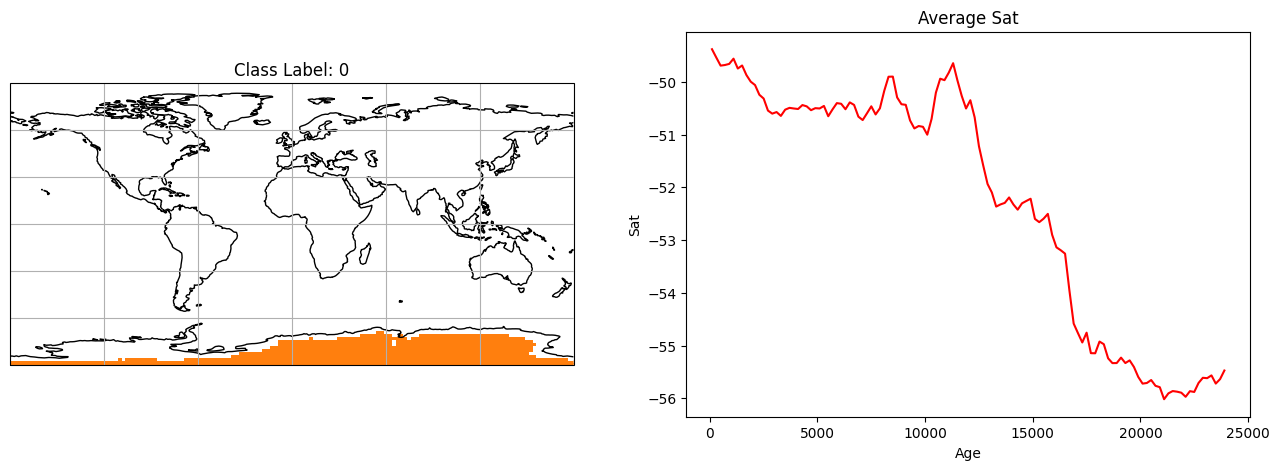

In [264]:
plot_indi_label(ds_sat, 0,plot_class=False)

In [271]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

def plot_all_label(ds,plot_class=False):
    sat_label = ds['class_label']
    # create a figure and axis
    nrow=len(np.unique(sat_label))
    fig = plt.figure(figsize=(16, 5*nrow))

    for i in np.unique(ds_sat['class_label']):
        label2plot=i
        # add coastline and gridlines
        ax = fig.add_subplot(nrow, 2, 2*i+1, projection=ccrs.PlateCarree())
        ax.add_feature(cfeature.COASTLINE)
        ax.gridlines()

        # plot heatmap
        colors = list(mcolors.TABLEAU_COLORS.values())
        colors = colors[1:len(np.unique(sat_label))+1]
        cmap = mcolors.ListedColormap(['#ffffff', colors[label2plot]])
        im = ax.pcolormesh(ds.lon, ds.lat, sat_label==label2plot, transform=ccrs.PlateCarree(), cmap=cmap, shading='auto')   
        ax.set_title('Class Label: '+str(label2plot))


    ##########################################
    # calculate average sat data for each label

        label_mask = ds['class_label'] == label2plot
        label_sat = ds['sat'].where(label_mask)
        label_sat_average = label_sat.mean(dim=('lat', 'lon'))

        # create axis for the second plot
        ax1 = fig.add_subplot(nrow, 2, 2*i+2)
        if plot_class:
            # plot all sat data in the same label as light grey lines
            # reshape the label_sat to a 2D array
            label_sat = label_sat.values
            label_sat = label_sat.reshape(label_sat.shape[0], label_sat.shape[1]*label_sat.shape[2])
            print(label_sat.shape)
            for i in range(label_sat.shape[1]):
                ax1.plot(ds['age'],label_sat[:,i], color='lightgray', alpha=0.1)

        ax1.plot(ds.age,label_sat_average,color='red')
        ax1.set_xlabel('Age')
        ax1.set_ylabel('Sat')
        ax1.set_title('Class Label: '+str(label2plot))

    plt.show()


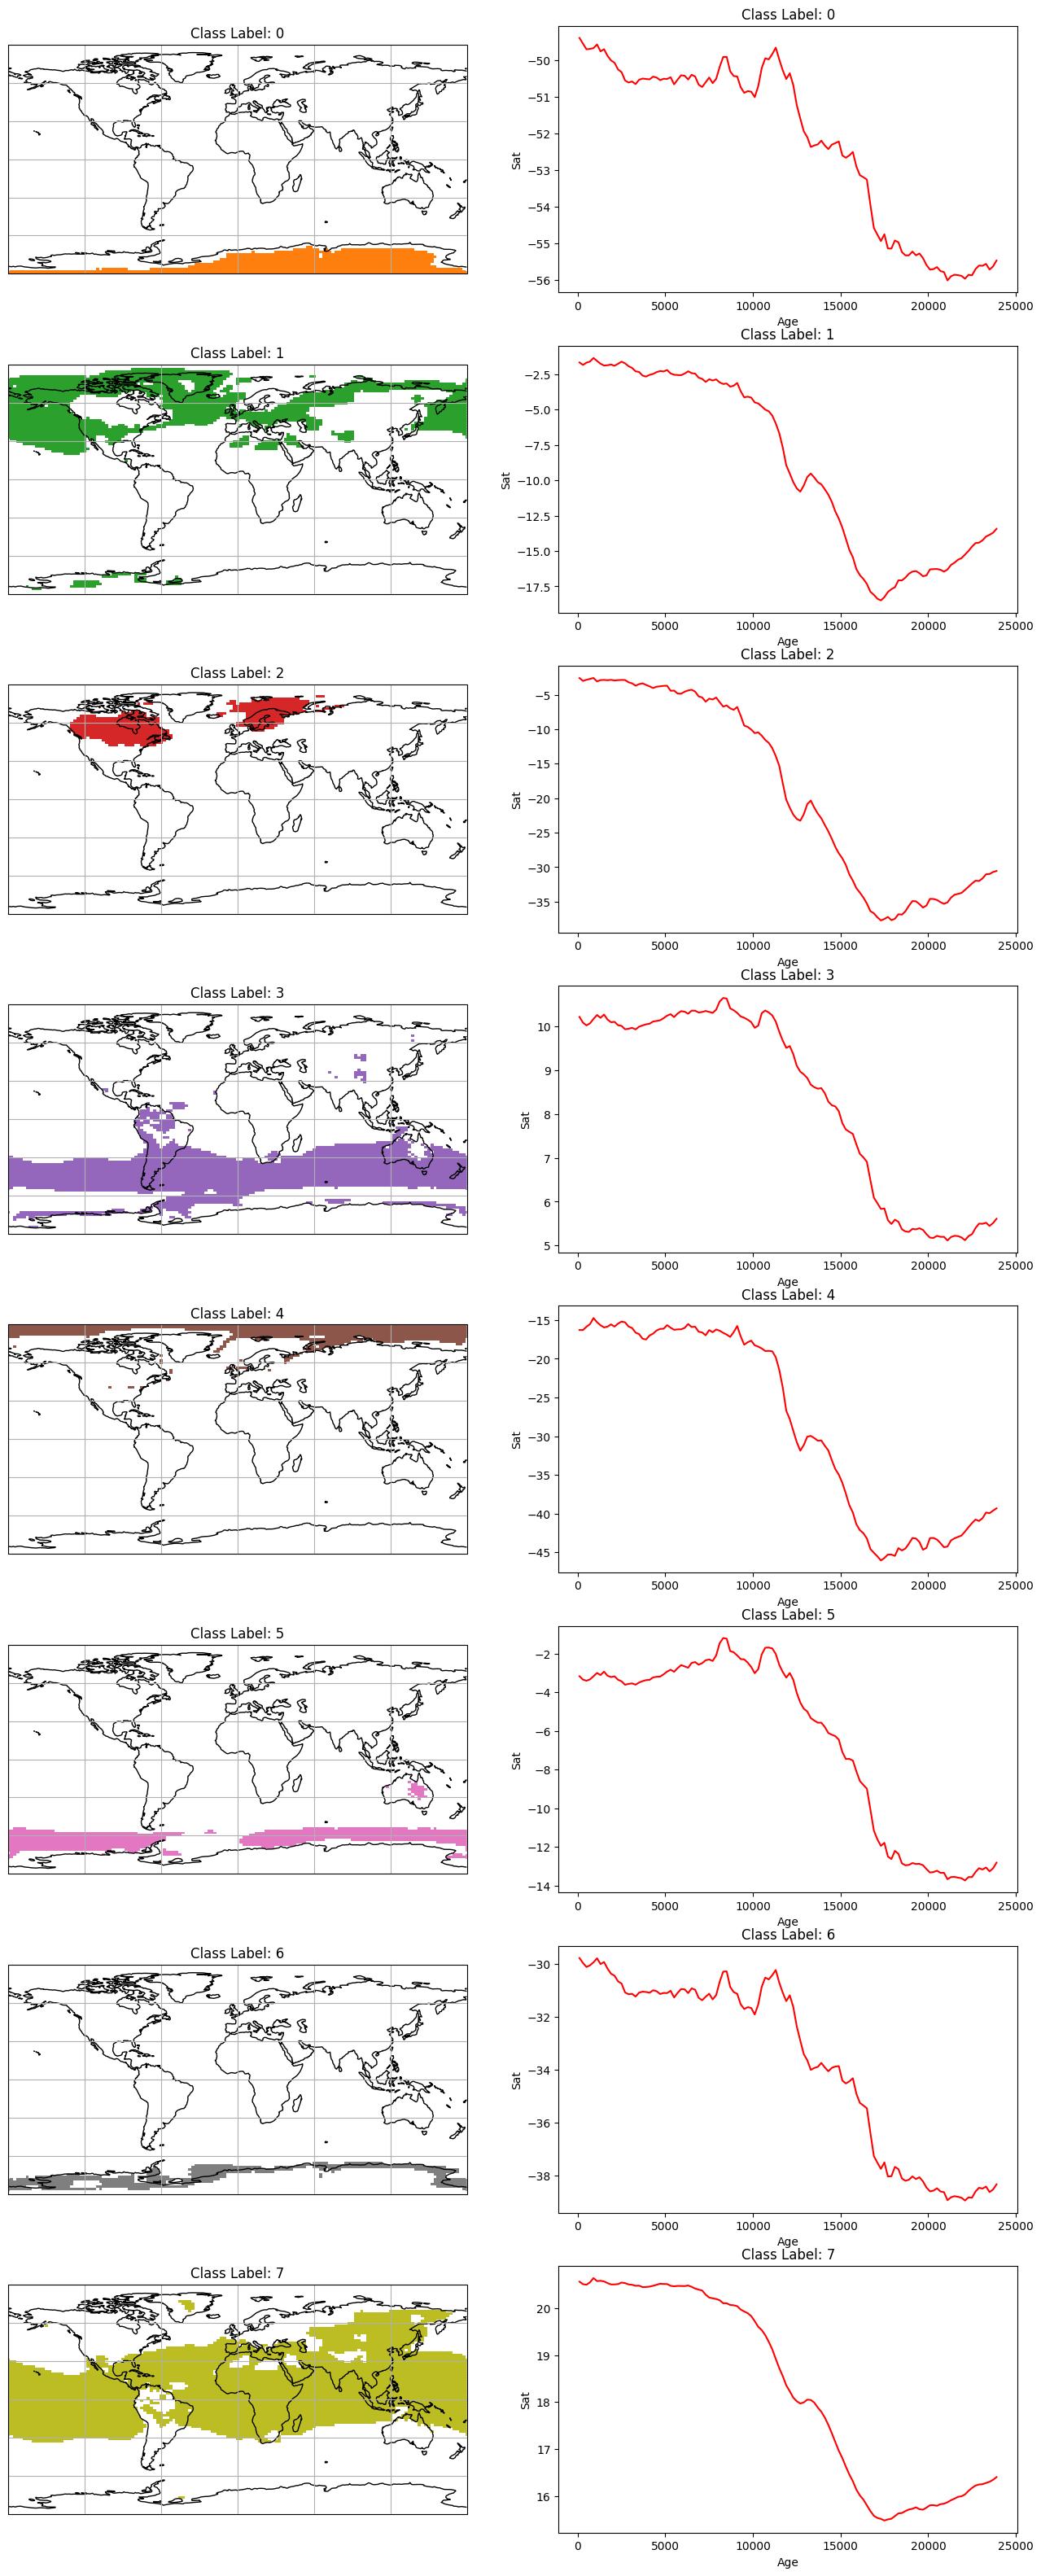

In [272]:
plot_all_label(ds_sat,plot_class=False)

In [303]:
#plot the average sat for each label using interactive plot
import plotly.graph_objs as go
from plotly.subplots import make_subplots

def plot_interac_mean(ds):
    sat_label = ds['class_label']

    ncol = 2  # set number of columns
    nrow = int(np.ceil(len(np.unique(sat_label)) // ncol))  # calculate number of rows based on number of columns
    
    fig = make_subplots(rows=nrow, cols=ncol, subplot_titles=[f"Class Label: {i}" for i in np.unique(ds['class_label'])])
    
    for i, label2plot in enumerate(np.unique(ds['class_label'])):
        label_mask = ds['class_label'] == label2plot
        label_sat = ds['sat'].where(label_mask)
        label_sat_average = label_sat.mean(dim=('lat', 'lon'))
        
        row_idx = (i // ncol) + 1  # calculate row index based on number of columns
        col_idx = (i % ncol) + 1  # calculate column index based on number of columns
        
        fig.add_trace(go.Scatter(x=ds.age, y=label_sat_average, mode='lines', name=f"Class Label: {label2plot}"), row=row_idx, col=col_idx)
        fig.update_xaxes(title_text='Age', row=row_idx, col=col_idx)
        fig.update_yaxes(title_text='Sat', row=row_idx, col=col_idx)
    
    fig.update_layout(height=500*nrow, width=800, showlegend=False)  # set width and height of the plot
    fig.show()


In [304]:
plot_interac_mean(ds_sat)

In [278]:

# def plot_interac_mean(ds):
#     sat_label = ds['class_label']
#     # create a figure and axis
#     nrow=len(np.unique(sat_label))
#     fig = plt.figure(figsize=(8, 5*nrow))

#     for i in np.unique(ds_sat['class_label']):
#         label2plot=i
        
#         label_mask = ds['class_label'] == label2plot
#         label_sat = ds['sat'].where(label_mask)
#         label_sat_average = label_sat.mean(dim=('lat', 'lon'))
#         # create axis for the second plot
#         ax1 = fig.add_subplot(nrow, 1, i+1)
   

#         ax1.plot(ds.age,label_sat_average,color='red')
#         ax1.set_xlabel('Age')
#         ax1.set_ylabel('Sat')
#         ax1.set_title('Class Label: '+str(label2plot))

#     plt.show()


In [83]:

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_indi_label(ds, label):
    # create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(projection=ccrs.PlateCarree()))

    # add coastline and gridlines
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines()

    # plot heatmap
    ds['class_label'].where(ds['class_label'] == label).plot(ax=ax)

    # set title and show plot
    ax.set_title(f'Class {label}')
    plt.colorbar().remove()
    plt.show()



In [86]:
# loop through class labels and plot the distribution
# find the unique labels
unique_labels = np.unique(ds_sat['class_label'])
unique_labels
# for i in unique_labels:
#     plot_indi_label(ds_sat, i)
    

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [89]:
len(unique_labels)

8

In [28]:
# def fit_2d_gmm(pca_score, n_components=3):
#     """Fit a 2D Gaussian mixture model to the temperature scores.
    
#     Parameters
#     ----------
#     pca_score : numpy.ndarray
#         2D array of pca scores
#     n_components : int
#         Number of components in the mixture model
        
#     """

#     import matplotlib.pyplot as plt
#     import numpy as np
#     from sklearn.mixture import GaussianMixture

#     # create a 2D GMM model
#     gmm_model = GaussianMixture(n_components=n_components, covariance_type='full')

#     # fit the model to the two columns of pca_score
#     gmm_model.fit(pca_score)

#     # plot the results
#     fig, ax = plt.subplots(1,2,figsize=(8,4),dpi=300)

#     # Plot the scatter plot of the two columns
#     ax[0].scatter(pca_score[:, 0], pca_score[:, 1], s=10, alpha=0.5)

#     # Plot the contour plot of the fitted GMM
#     x, y = np.meshgrid(np.linspace(np.min(pca_score[:, 0]), np.max(pca_score[:, 0]), 100), 
#                        np.linspace(np.min(pca_score[:, 1]), np.max(pca_score[:, 1]), 100))
#     XX = np.array([x.ravel(), y.ravel()]).T
#     Z = -gmm_model.score_samples(XX)
#     Z = Z.reshape(x.shape)
#     ax[1].contour(x, y, Z, cmap='coolwarm_r')

#     # Add labels and title
#     ax[0].set_xlabel('PC 1')
#     ax[0].set_ylabel('PC 2')
#     ax[1].set_xlabel('PC 1')
#     ax[1].set_ylabel('PC 2')
#     ax[0].set_title('Scatter plot of PCA scores')
#     ax[1].set_title('Contour plot of fitted GMM')

#     plt.tight_layout()
#     plt.show()



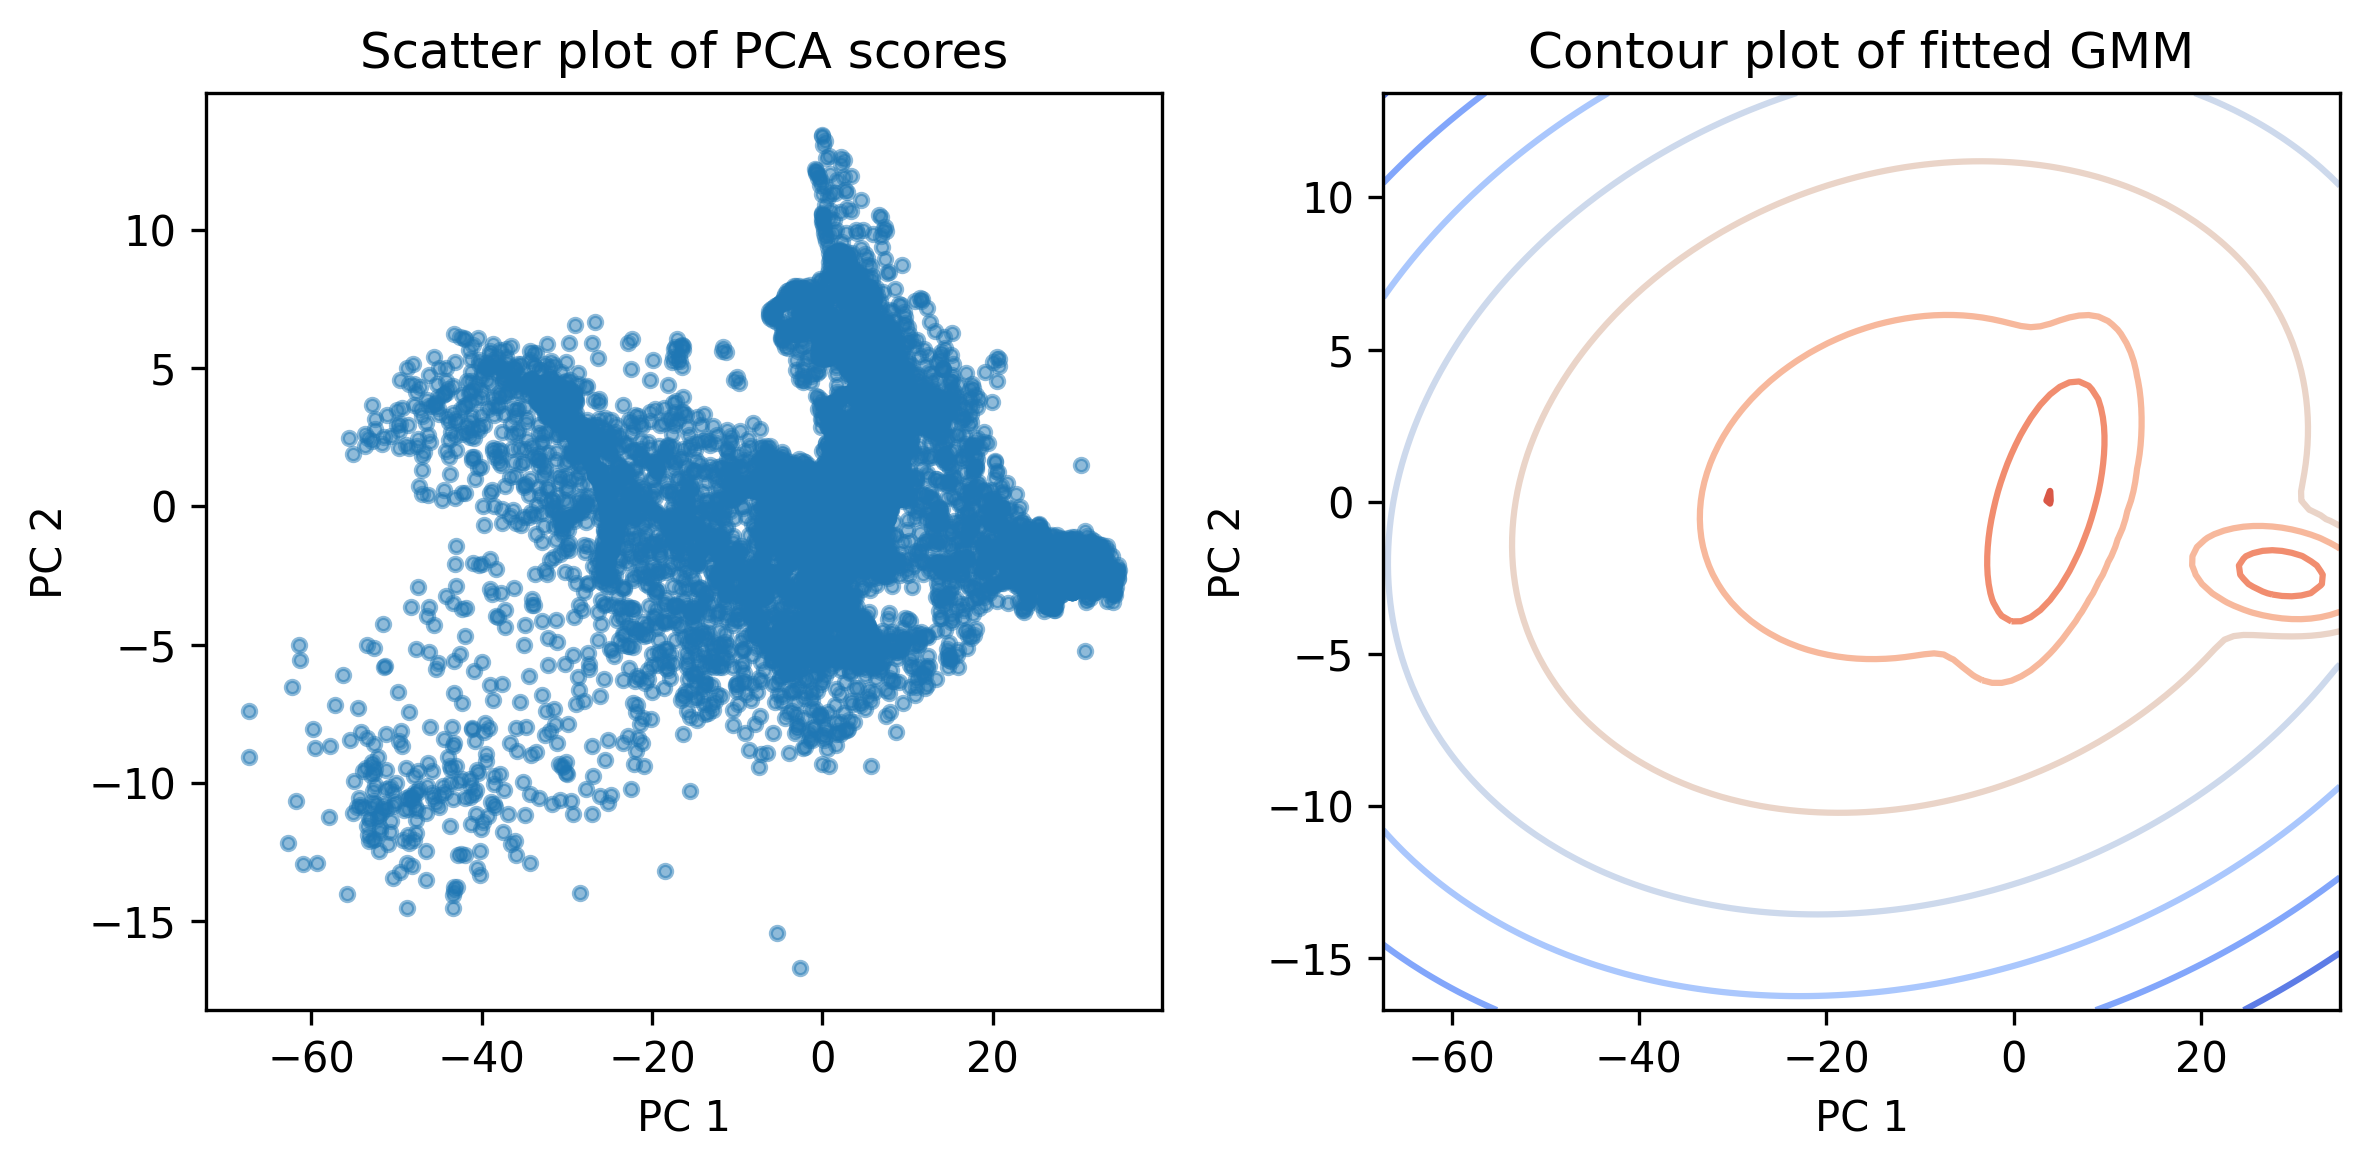

GaussianMixture(n_components=3)

In [27]:
fit_2d_gmm(temp_score, n_components=3)

In [ ]:
# function for fit the 1d gmm
def fit_1d_gmm(pca_score, n_components=3):
    """Fit a Gaussian mixture model to the temperature scores.
    
    Parameters
    ----------
    temp_score : numpy.ndarray
        Array of pca scores
    n_components : int
        Number of components in the mixture model
        
    Returns
    -------
    gmm_models : list
        List of Gaussian mixture models
    """

    import matplotlib.pyplot as plt
    import numpy as np
    from sklearn.mixture import GaussianMixture

    gmm_models = []
    for i in range(pca_score.shape[1]): # loop through each column in temp_score
        gmm = GaussianMixture(n_components=n_components) # create a GMM model
        gmm.fit(pca_score[:,i].reshape(-1,1)) # fit the model to the column of temp_score
        gmm_models.append(gmm) # store the model in a list


    n_cols = temp_score.shape[1]  # number of principal components
    fig, ax = plt.subplots(1,n_cols,figsize=(4*n_cols,3),dpi=300)

    for i in range(n_cols):
        # Get the data for the histogram
        data = pca_score[:, i]

        # Plot the histogram
        counts, bins, _ = ax[i].hist(data, bins=100, density=True, alpha=0.5, label='Histogram')

        # Get the data for the fitted GMM
        x = np.linspace(np.min(data), np.max(data), 1000).reshape(-1, 1)
        logprob = gmm_models[i].score_samples(x)
        pdf = np.exp(logprob)

        # Plot the fitted GMM
        ax[i].plot(x, pdf, linewidth=2, label='Fitted GMM')

        # Add labels and legend
        ax[i].set_xlabel(xlabel)
        if i==0:
            ax[i].set_ylabel('Probability Density')
            ax[i].legend()

    plt.subplots_adjust(wspace=0.3)
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize the data
scaler = StandardScaler()
temp_scaled = scaler.fit_transform(temperature)

# pca
from sklearn.decomposition import PCA
from scipy.stats import zscore


n_pc=3  # number of principal components
pca_T = PCA(n_components=n_pc)
columns = [f'pc {i}' for i in range(1, n_pc+1)]

pca_temp = pca_T.fit_transform(temp_scaled.T)
pca_temp_df = pd.DataFrame(data = pca_temp
             , columns = columns)



temp_score=temp_scaled.dot(zscore(pca_temp))

v_exp_temp = pca_T.explained_variance_ratio_


In [ ]:
# select a record a put it into a ndarray with two columns, with the first column is the age and the second column is the SAT
import numpy as np
sat = np.vstack((ds_sat.age,ds_sat.sel(lat=-90, lon=0)['sat'].values))
sat=sat.T



c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


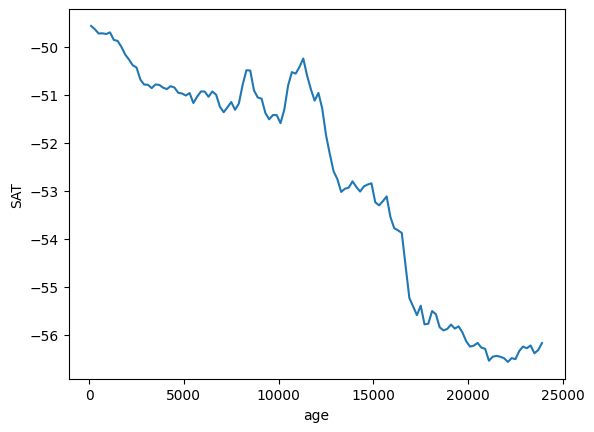

In [ ]:
# plot sat
import matplotlib.pyplot as plt
plt.plot(sat[:,0],sat[:,1])
plt.xlabel('age')
plt.ylabel('SAT')
plt.show()